# Predicting diabetes disease using machine learning

this notebook looks into using various Python-based machine learning and data science libraries in an attempt to build machine learning model capable of predicting whether or not someone has Diabetes disease based on their medical attributes

we're going to take the following approach

    1. Problem definition
    2. Data
    3. Evaluation
    4. Features
    5. Modeling
    4. Building a Predictive System
    
## 1. Problem Definition

In a statement
> Given clinical parameters about a patient, can we predict whether or not they have Diabetes disease

## 2. Data

the original data come from diabetes Features For Analysis on Kaggle
URL:  https://www.kaggle.com/datasets/mathchi/diabetes-data-set

## 3.Evaluation 
> if we can reach 75% accuracy at prediction whether or not a patient has Diabetes disease during the proof of concept, we'll pursue the project

## 4.features

*Create data dictionary *

> Pregnancies: Number of times pregnant

> Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

> BloodPressure: Diastolic blood pressure (mm Hg)

> SkinThickness: Triceps skin fold thickness (mm)

> Insulin: 2-Hour serum insulin (mu U/ml)

> BMI: Body mass index (weight in kg/(height in m)^2)

> DiabetesPedigreeFunction: Diabetes pedigree function

> Age: Age (years)

> Outcome: Class variable (0 or 1)

# Preparing the tools

we're going to use pandas , Matplotlib , Numpy and some of scikitLearn librairy for data analysis and manipulation

    

In [64]:
# Import all the tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# the diffrent models (just to choose the best one)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Models from Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from PIL import Image

# Model Evaluations
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score,  GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Load DATA

In [65]:
# Read data
diabetes_data = pd.read_csv('diabetes.csv')
# Show data 
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [66]:
# print the first 5 rows of DataFrame
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [67]:
# print last 5 rows of the DataFrame

diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [68]:
# Number of rows and columns in the dataset

diabetes_data.shape

(768, 9)

In [69]:
# getting some info about the data

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Make sure it's all numeric


In [70]:
# view types of the data
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

* we need to change it like the following:

> {"diabetic": 1, "Non diabetic": 0}


In [71]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Missing values
1. Fill them with some value (also khnow as imputation) .
2. Remove the samples with missing data alltogether

In [72]:
# see data with missing values (NaN)
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [73]:
# show how much missing values there are
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [74]:
### the dataset doesn't have missing values

In [75]:
len(diabetes_data)

768

In [76]:
# show data
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [77]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

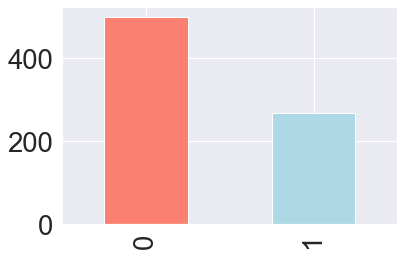

In [78]:
diabetes_data['Outcome'].value_counts().plot(kind='bar', color=["salmon", "lightblue"])

# Some reading about the features

## Diabetes disease Frequency according to Age

In [79]:
# Compare Outcome column with Age column
pd.crosstab(diabetes_data.Outcome, diabetes_data['Age'])

Age,21,22,23,24,25,26,27,28,29,30,...,63,64,65,66,67,68,69,70,72,81
Outcome,,,,,,,,,,,,,,,,,,,,,
0,58,61,31,38,34,25,24,25,16,15,...,4,1,3,2,2,1,2,0,1,1
1,5,11,7,8,14,8,8,10,13,6,...,0,0,0,2,1,0,0,1,0,0


In [80]:
# Create a plot of crosstab
pd.crosstab(diabetes_data.Outcome, diabetes_data['Age']).plot(kind="bar",
                                   figsize=(10, 6))


plt.title("Diabetes Disease Frequency for Age")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0);

NameError: name 'alzheimer_data' is not defined

In [ ]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(diabetes_data.Age[diabetes_data.Outcome ==1],
           diabetes_data.Glucose[diabetes_data.Outcome==1],
           c="salmon")

# Scatter with negative examples
plt.scatter(diabetes_data.Age[diabetes_data.Outcome ==0],
           diabetes_data.Glucose[diabetes_data.Outcome==0],
           c="lightblue")

# Add some helpful info
plt.title("Diabetes Disease in function of Age and Glucose")
plt.xlabel("Age")
plt.ylabel("Insulin")
plt.legend(["Disease", "No Disease"])

In [ ]:
# Make a correlation matrix
diabetes_data.corr()

In [ ]:
# Let's make our correlation matrix a little prettier
corr_matrix = diabetes_data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="Blues")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+ 0.5, top-0.5)

# Spliting the Features and group

In [ ]:
X = diabetes_data.drop(columns='Outcome', axis=1)
Y = diabetes_data['Outcome']

In [ ]:
X

In [ ]:
Y

# Splitting the data into Training data & Test Data

In [ ]:
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=2)
# test_size: mean how much percentage of the data you want to test

In [ ]:
X_train.shape, X_test.shape

In [ ]:
Y_train.shape, Y_test.shape

In [ ]:
X.shape, Y.shape

Now we've got our data split into training and test sets, it's time to build a machine learning model

we'll train if(find the patterns) on the training set

And we'll test it (use the patterns) on the test set

We're going to choose one the 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [ ]:
# Put models in a dictionnary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    Y_train : training labels
    Y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    #Make a dictionary to keep models scores
    model_scores = {}
    # loop through Models
    for name, model in models.items():
        
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [ ]:
print(fit_and_score(models, X_train, X_test, Y_train, Y_test))
model_compare = pd.DataFrame(fit_and_score(models, X_train, X_test, Y_train, Y_test), index=["accuracy"])
model_compare.plot.bar()

=> from the plot up we can decide that Random Forest is the best model for this dataframe

# Model training

> Random Forest Classifier

In [ ]:
model = RandomForestClassifier()

In [ ]:
# Training the RandomForestClassifier model with Training data
model.fit(X_train, Y_train)

# Model Evaluation

> Accurancy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print(f'Accuracy on Training data : {training_data_accuracy}')

In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print(f'Accuracy on Test data : {test_data_accuracy}')

In [ ]:
# Make predictions with tuned model
y_preds = model.predict(X_test)
y_preds

In [ ]:
Y_test

what is ROC curve?
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.

In [ ]:
# View accuracy score
accuracy_score(Y_test, y_preds)

=> This model has an accuracy score of 92% on the test data. That seems pretty impressive, but accuracy is not a great measure of classifier performance when the classes are imbalanced

## Confusion matrix

A confusion matrix is a way to express how many of a classifier’s predictions were correct, and when incorrect, where the classifier got confused. 

In [ ]:
matrix = confusion_matrix(Y_test, y_preds)
matrix

In [ ]:
sns.set(font_scale = 2.5)

def plot_conf_mat(Y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax= plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(Y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(Y_test, y_preds)

Now it’s easy to see that our classifier struggled at predicting
## Classification report
To get even more insight into model performance, we should examine other metrics like precision, recall, and F1 score

In [ ]:
# View the classification report for test data and predictions
print(classification_report(Y_test, y_preds))

Precision is high, meaning that the model was careful to avoid labeling things. 

### Calculate evaluation metrics using cross-validation

we're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using 'cross_val_scores()'

In [ ]:
# Cross-validated accuracy
cv_acc = cross_val_score(model,X,Y, cv=5, scoring="accuracy").mean()
cv_acc

In [ ]:
# Cross-validated precision
cv_precision = cross_val_score(model,
                               X,
                               Y, 
                               cv=5, 
                               scoring="precision_micro"
                               ).mean()

cv_precision

In [ ]:
# Cross-validated recall
cv_recall = cross_val_score(model, X, Y, scoring="recall_micro", cv = 5).mean()
cv_recall

In [ ]:
# Cross-validated f1-score
cv_f1 = cross_val_score(model,
                       X,
                       Y,
                       cv=5,
                       scoring="f1_micro").mean()
cv_f1

In [ ]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy":cv_acc,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "F1": cv_f1
}, index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)

## Feature importance

Feature importance is another as asking, " which featurs contributed most to the outcomes of the model and how did they contribute ?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our RandomForestClassifier model...

In [ ]:
# Match coef's of feature to columns
feature_dict = dict(zip(X.columns, list(model.feature_importances_)))
feature_dict

In [ ]:
# Visualize feature importance
feature_data = pd.DataFrame(feature_dict, index=[0])
feature_data.T.plot.bar(title="Feature Importance", legend=False)

# Example: Building a Predictive System

In [81]:
input_data = (1,89,66,23,94,28.1,0.167,21)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicitng for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)

    
output=''
if prediction[0] == 0:
  output = 'You are not Diabetic'
else:
  output = 'You are Diabetic'
    

In [82]:
output

'You are not Diabetic'